In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import torch
torch.cuda.is_available()

True

### Bike sharing dataset from Kaggel https://www.kaggle.com/akkithetechie/new-york-city-bike-share-dataset

In [2]:
df = pd.read_csv('./data/NYC-BikeShare-2015-2017-combined.csv')

df.head()

,Unnamed: 0,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Trip_Duration_in_min
0,0,376,2015-10-01 00:16:26,2015-10-01 00:22:42,3212,Christ Hospital,40.734786,-74.050444,3207,Oakland Ave,40.737604,-74.052478,24470,Subscriber,1960.0,1,6
1,1,739,2015-10-01 00:27:12,2015-10-01 00:39:32,3207,Oakland Ave,40.737604,-74.052478,3212,Christ Hospital,40.734786,-74.050444,24481,Subscriber,1960.0,1,12
2,2,2714,2015-10-01 00:32:46,2015-10-01 01:18:01,3193,Lincoln Park,40.724605,-74.078406,3193,Lincoln Park,40.724605,-74.078406,24628,Subscriber,1983.0,1,45
3,3,275,2015-10-01 00:34:31,2015-10-01 00:39:06,3199,Newport Pkwy,40.728745,-74.032108,3187,Warren St,40.721124,-74.038051,24613,Subscriber,1975.0,1,5
4,4,561,2015-10-01 00:40:12,2015-10-01 00:49:33,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,24668,Customer,1984.0,0,9


### Dataset weekly indexing 

In [3]:
df['Date'] = pd.to_datetime(df['Start Time']).dt.date
df['Time'] = pd.to_datetime(df['Start Time']).dt.time
 
#df['month'] = pd.to_datetime(df['Date']).dt.month

df['week'] = pd.to_datetime(df['Date']) - pd.to_timedelta(7, unit='d')

df['Normalized Trip Duration']=abs(df['Trip Duration']-df['Trip Duration'].mean()) /df['Trip Duration'].std()
df1 = df[[ 'Start Station ID', 'End Station ID', 'Normalized Trip Duration', 'Date','week']]
df1

,Start Station ID,End Station ID,Normalized Trip Duration,Date,week
0,3212,3207,0.013738,2015-10-01,2015-09-24
1,3207,3212,0.004806,2015-10-01,2015-09-24
2,3193,3193,0.043793,2015-10-01,2015-09-24
3,3199,3187,0.016224,2015-10-01,2015-09-24
4,3183,3192,0.009186,2015-10-01,2015-09-24
...,...,...,...,...,...
735497,3195,3201,0.017110,2017-03-31,2017-03-24
735498,3183,3267,0.018266,2017-03-31,2017-03-24
735499,3183,3214,0.018414,2017-03-31,2017-03-24
735500,3272,3268,0.007784,2017-03-31,2017-03-24


In [4]:

start = df['Start Station ID'].unique().tolist()

end = df['End Station ID'].unique().tolist()

all_stations= list(set(start+end))


station2index = {}
for st in all_stations:
    if station2index.get(st) is None:
        station2index[st] = len(station2index)
        

print(' numeber of bike stations: ',len(all_stations))   
    
index2station = {v:k for k, v in station2index.items()}

 numeber of bike stations:  114


### Adjacency matrix in general (how stations are connected)

In [5]:

rep= dict()

f=open("./data/NYC_edgelist.txt", "w")

for index, row in df.iterrows():
    
    a=  row['Normalized Trip Duration']
    
    rep[(station2index[row[ 'Start Station ID']], station2index[row[ 'End Station ID']])]= round(a,4)
    
    
    f.write( str(station2index[row[ 'Start Station ID']]) + " "+ str(station2index[row[ 'End Station ID']]))
    
    f.write('\n')
    
    #print( station2index[row[ 'Start Station ID']], station2index[row[ 'End Station ID']] )
    
f.close() 
print('all stations are recorded ...')    


all stations are recorded ...


In [6]:
 
import numpy as np

adj_target = np.zeros([ len(all_stations), len(all_stations)], dtype = float)

print(adj_target.shape)

for i in range(len( all_stations)):
    for j in range(len( all_stations)):
    
        if (i,j) in list(rep):

            adj_target[i][j]=rep[(i,j)]
            
            adj_target[j][i]=rep[(i,j)]

        else:
            adj_target[i][j]=0
            

    

np.savetxt("./data/NYC_adj.csv", adj_target, delimiter=",", fmt='%s')

    
df_adj = pd.read_csv('./data/NYC_adj.csv')
df_adj

(114, 114)


,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0759,0.0616,0.0.7,...,0.0.97,0.0.98,0.0.99,0.0.100,0.0.101,0.0.102,0.0.103,0.0.104,0.0.105,0.0.106
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0475,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Sequence of weekly graphs

In [7]:

from collections import defaultdict

edge_list=defaultdict(list)


week2index = {}
for w in df1['week']:
    
    if week2index.get(w) is None:
        week2index[w] = len(week2index)
        
index2week = {v:k for k, v in week2index.items()}

print('The first week:', index2week[0])

for index, row in df1.iterrows():
    
    
    edge_list[ week2index[row['week']] ].append((station2index[row['Start Station ID']], station2index[row['End Station ID']]) )
 
        
print(len(week2index), 'sequence of weeks')  


The first week: 2015-09-24 00:00:00
550 sequence of weeks


In [25]:
import networkx as nx


out_deg_collection=defaultdict(list)

deg_seq=[]

deg_record=defaultdict(list)

in_deg_collection=defaultdict(list)

for i in range(len(edge_list)):
    
    G = nx.DiGraph()
    G.add_edges_from(edge_list[i])
    
    nodes=list(G.nodes)
    
    
    for v in range(len(all_stations)):
        
        if v in nodes:

           out_degree=G.out_degree(v)
        
           in_degree=G.in_degree(v)
        
           deg_seq.append(out_degree)
            

           out_deg_collection[int(v)].append(out_degree )
           in_deg_collection[int(v)].append(in_degree )
           
            
        else:
            
          out_deg_collection[int(v)].append(0)
          in_deg_collection[int(v)].append(0)
        
     
        

print('length of degree sequence in each station:', len(out_deg_collection[10]))

print('max out_degree in this dataset:',max(deg_seq))


print('degrees :',set(deg_seq))

    
print('The first week:', index2week[0]) 



record_stations={}

for st in range(len(all_stations)):
    
    
    l=sorted(out_deg_collection[st], reverse=True)
        
    record_stations[st]= l[0]
    
    
out_deg_list=[] 
for st in range(len(all_stations))  :
    
        
   out_deg_list.append(record_stations[st])



in_record_stations={}

for st in range(len(all_stations)):
    
    
    l=sorted(in_deg_collection[st], reverse=True)
        
    in_record_stations[st]= l[0]
    
    
in_deg_list=[] 

for st in range(len(all_stations))  :

   in_deg_list.append(in_record_stations[st]) 


length of degree sequence in each station: 550
max out_degree in this dataset: 33
degrees : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}
The first week: 2015-09-24 00:00:00


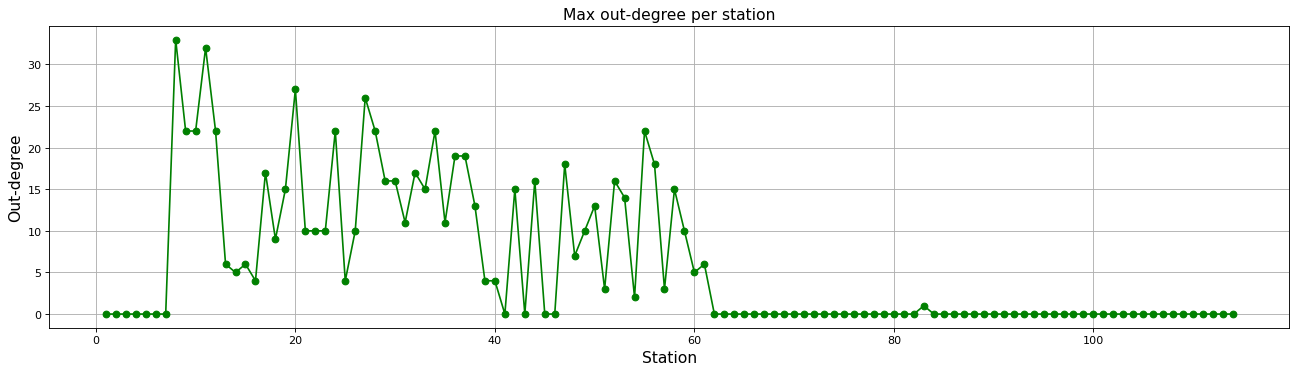

In [19]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


figure(figsize=(20, 5), dpi=80)  
Data = {'week': range(1, len(all_stations)+1),
        'out-degree': out_deg_list
       }
  
df = pd.DataFrame(Data,columns=['week','out-degree'])
  
plt.plot(df['week'], df['out-degree'], color='g', marker='o' ) #marker='o'
plt.title('Max out-degree per station', fontsize=14)
plt.xlabel('Station', fontsize=14)
plt.ylabel('Out-degree', fontsize=14)


plt.grid(True)
plt.show() 

### Many stations are dead end in this dataset.

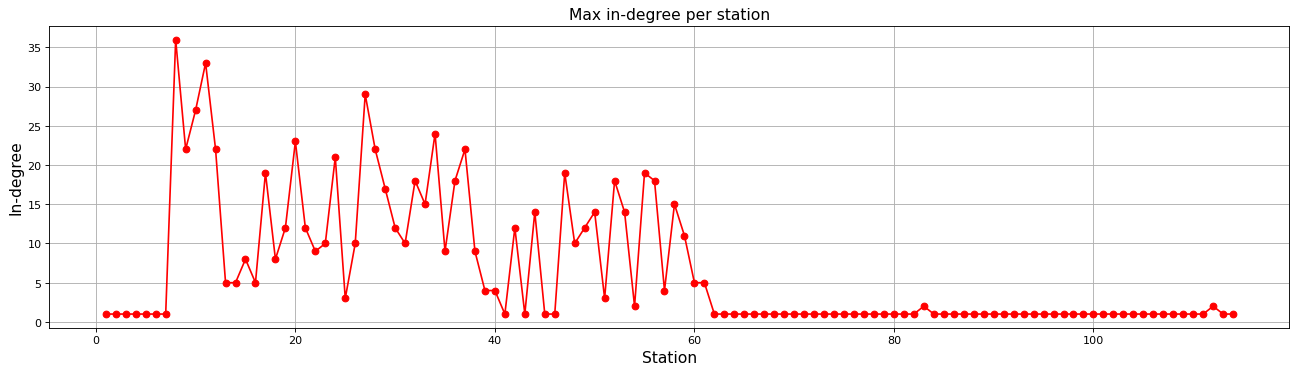

In [22]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


figure(figsize=(20, 5), dpi=80)  
Data = {'week': range(1, len(all_stations)+1),
        'in-degree': in_deg_list
       }
  
df = pd.DataFrame(Data,columns=['week','in-degree'])
  
plt.plot(df['week'], df['in-degree'], color='r', marker='o' ) #marker='o'
plt.title('Max in-degree per station', fontsize=14)
plt.xlabel('Station', fontsize=14)
plt.ylabel('In-degree', fontsize=14)


plt.grid(True)
plt.show() 

### Many stations have in-degree of 1 in this dataset.

out-degree order: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33} 



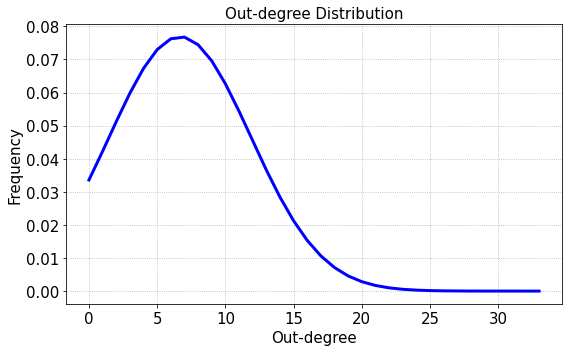

In [24]:
print('out-degree order:',set(list(deg_seq )),'\n')

from scipy import stats
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

ax.grid(True)
ax.grid(linestyle=':')


deg_seq.sort()
hmean = np.mean(deg_seq)
hstd = np.std(deg_seq)
pdf = stats.norm.pdf(deg_seq, hmean, hstd)
plt.plot(deg_seq, pdf, color= 'blue', linewidth=3)

plt.xlabel('Out-degree', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Out-degree Distribution', fontsize=15)


plt.tick_params(axis='both',labelsize=15)
fig.tight_layout()
plt.show()

#### Most stations need 3 to 12 bikes, there are few stations which need more than 20 bikes. 

### A random weekly graph

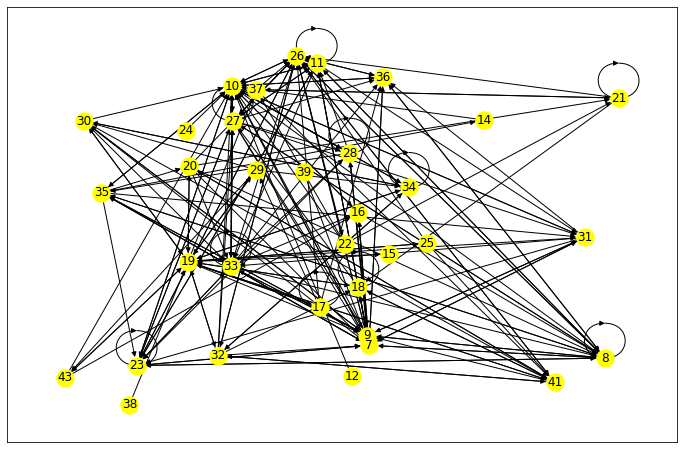

In [37]:
G = nx.DiGraph()
G.add_edges_from(edge_list[0])
plt.figure(figsize =(12, 8))
nx.draw_networkx(G,node_color ='yellow', pos=nx.random_layout(G) ) 

### Stream of out-degree in each station 

In [38]:
feat_matrix=[]

for v in range(len(all_stations)):
    
  feat_matrix.append(out_deg_collection[v])


m=np.array(feat_matrix) 

feat_array=np.rot90(m)

print(feat_array.shape)

np.savetxt("./data/NYC_deg.csv", feat_array, delimiter=",", fmt='%s')

df_deg = pd.read_csv('./data/NYC_deg.csv')

df_deg

(550, 114)


,0,0.1,0.2,0.3,0.4,0.5,0.6,17,13,8,...,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80
0,0,0,0,0,0,0,0,16,10,15,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,19,10,20,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,13,15,15,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,14,15,18,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,14,15,16,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,0,0,0,0,0,0,0,18,14,14,...,0,0,0,0,0,0,0,0,0,0
545,0,0,0,0,0,0,0,14,12,13,...,0,0,0,0,0,0,0,0,0,0
546,0,0,0,0,0,0,0,11,2,6,...,0,0,0,0,0,0,0,0,0,0
547,0,0,0,0,0,0,0,7,3,4,...,0,0,0,0,0,0,0,0,0,0


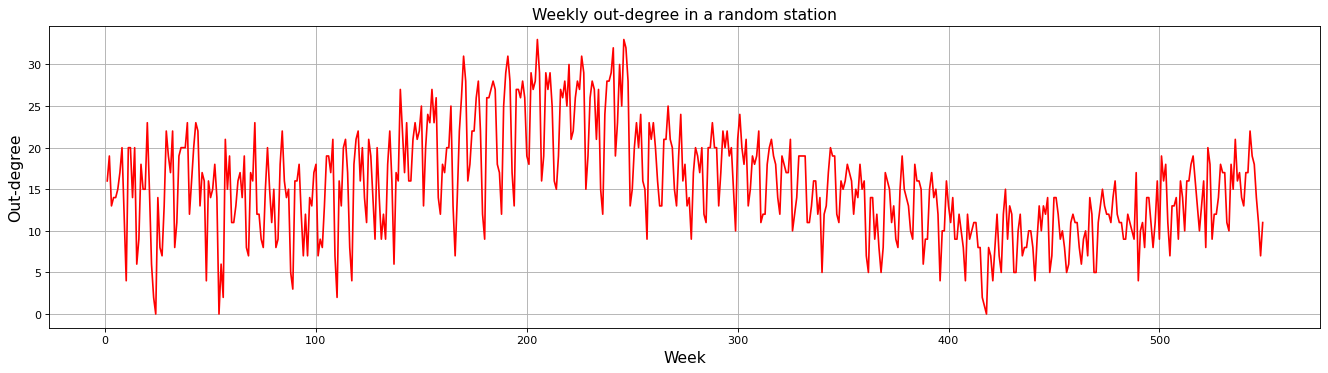

In [40]:

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



degree_per_station=df_deg.iloc[:,[7]]

degree_in_station=[]
for i in degree_per_station.values:

   degree_in_station.append(i[0])


figure(figsize=(20.5, 5), dpi=80)  
Data = {'week': list(range(1, len(degree_in_station)+1)),
        'out-degree': degree_in_station
       }
  
df = pd.DataFrame(Data,columns=['week','out-degree'])
  
plt.plot(df['week'], df['out-degree'], color='red' ) #marker='o'
plt.title('Weekly out-degree in a random station', fontsize=14)
plt.xlabel('Week', fontsize=14)
plt.ylabel('Out-degree', fontsize=14)


plt.grid(True)
plt.show()                     
                     

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#%run ./TGCN_bike/main.py

In [68]:
import pandas
from collections import defaultdict


results_holder=defaultdict(dict)

for model in ["GCN", "GRU", "TGCN"]:
    with open('./results/results_%s.csv'%model, 'r') as f:
       reader = csv.reader(f)
       for row in reader:
          #print(row[0], row[1])
        
          results_holder[model][row[0]]= float(row[1])

print("GCN   MAE:", results_holder["GCN"]['MAE'])
print("GRU   MAE:" , results_holder["GRU"]['MAE'])
print("TGCN  MAE:", results_holder["TGCN"]['MAE'])

GCN   MAE: 1.7383038997650146
GRU   MAE: 0.5781725645065308
TGCN  MAE: 1.4994075298309326


### Results reported by Mean Absolut Error (MAE) and Root Mean Squred Error (RMSE)

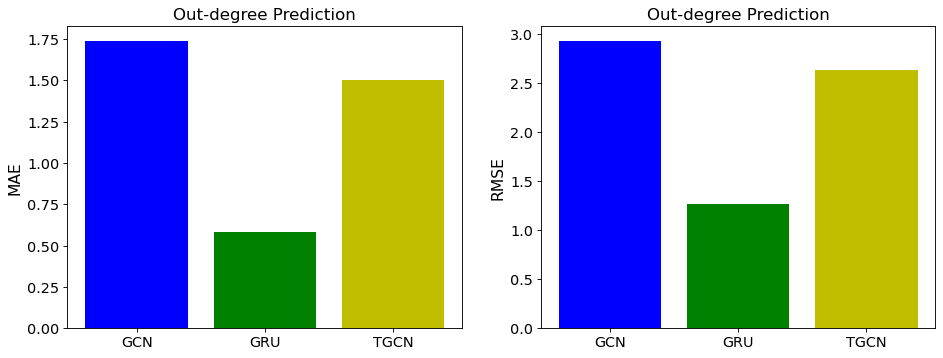

In [69]:

from matplotlib.pyplot import figure

figure(figsize=(14, 5), dpi=80)

plt.subplot(1, 2, 1)

height = [round(results_holder["GCN"]['MAE'],2), round(results_holder["GRU"]['MAE'],2),
          round(results_holder["TGCN"]['MAE'] ,2)]

bars = ('GCN', 'GRU', 'TGCN')
y_pos = np.arange(len(bars))

plt.bar(y_pos, height, color=['b', 'g', 'y'])
plt.xticks(y_pos, bars)


plt.title('Out-degree Prediction', fontsize=15)

plt.ylabel('MAE', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.subplot(1, 2, 2)


height = [round(results_holder["GCN"]['RMSE'],2), round(results_holder["GRU"]['RMSE'],2),
          round(results_holder["TGCN"]['RMSE'] ,2)]


bars = ('GCN', 'GRU', 'TGCN')
y_pos = np.arange(len(bars))

plt.bar(y_pos, height, color=['b', 'g', 'y'])
plt.xticks(y_pos, bars)


plt.title('Out-degree Prediction', fontsize=15)

plt.ylabel('RMSE', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

### Comparing prediction performance based on Accuracy and R2

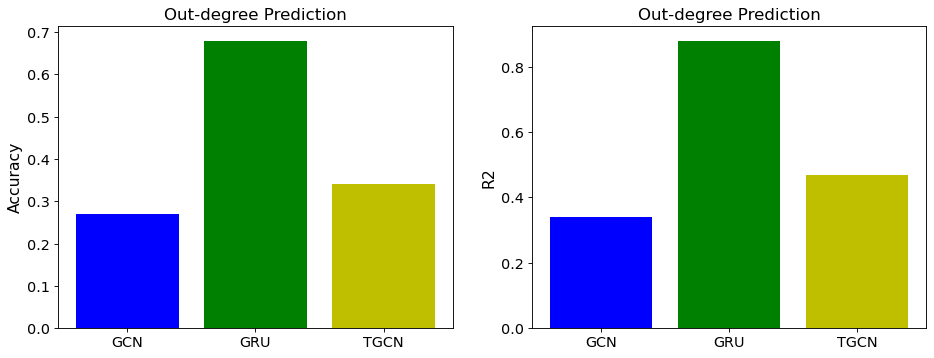

In [70]:
from matplotlib.pyplot import figure

figure(figsize=(14, 5), dpi=80)

plt.subplot(1, 2, 1)

height = [round(results_holder["GCN"]['accuracy'],2), round(results_holder["GRU"]['accuracy'],2),
          round(results_holder["TGCN"]['accuracy'] ,2)]

bars = ('GCN', 'GRU', 'TGCN')
y_pos = np.arange(len(bars))

plt.bar(y_pos, height, color=['b', 'g', 'y'])
plt.xticks(y_pos, bars)


plt.title('Out-degree Prediction', fontsize=15)

plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.subplot(1, 2, 2)


height = [round(results_holder["GCN"]['R2'],2), round(results_holder["GRU"]['R2'],2),
          round(results_holder["TGCN"]['R2'] ,2)]


bars = ('GCN', 'GRU', 'TGCN')
y_pos = np.arange(len(bars))

plt.bar(y_pos, height, color=['b', 'g', 'y'])
plt.xticks(y_pos, bars)


plt.title('Out-degree Prediction', fontsize=15)

plt.ylabel('R2', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()